In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime 


from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['axes.grid'] = True

import pandas_profiling 
import scipy.stats as stats

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.formula.api as smf

from datetime import datetime,date, timedelta
from sklearn.model_selection import train_test_split
from sklearn import metrics
from functools import reduce

In [2]:
d1=pd.read_csv('C:\\Users\\Yash\\Desktop\\STATS\\CASE STUDY FOR PANDAS\\5. Pandas Case Study 3 - Insurance Claims Case Study\\claims.csv')
d2=pd.read_csv('C:\\Users\\Yash\\Desktop\\STATS\\CASE STUDY FOR PANDAS\\5. Pandas Case Study 3 - Insurance Claims Case Study\\cust_demographics.csv')


In [3]:
d1.head()

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No


In [4]:
d2.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold


In [5]:
d4 = pd.merge(left=d2,right=d1,left_on='CUST_ID',right_on='customer_id', how = "inner",indicator = True)
d4.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,_merge
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,both
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,both
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes,both
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No,both
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No,both


In [6]:
data=d4.drop(columns = '_merge')
data.dropna(inplace = True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1011 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CUST_ID              1011 non-null   int64  
 1   gender               1011 non-null   object 
 2   DateOfBirth          1011 non-null   object 
 3   State                1011 non-null   object 
 4   Contact              1011 non-null   object 
 5   Segment              1011 non-null   object 
 6   claim_id             1011 non-null   int64  
 7   customer_id          1011 non-null   int64  
 8   incident_cause       1011 non-null   object 
 9   claim_date           1011 non-null   object 
 10  claim_area           1011 non-null   object 
 11  police_report        1011 non-null   object 
 12  claim_type           1011 non-null   object 
 13  claim_amount         1011 non-null   object 
 14  total_policy_claims  1011 non-null   float64
 15  fraudulent           1011 non-null   o

In [8]:
data.isnull().sum()

CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
dtype: int64

In [9]:
#Q2Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance

In [10]:
from pandas import DataFrame,Series
d=data.dtypes[data.dtypes!='object'].index.values
data[d]=data[d].astype('float64')
mean=DataFrame({'mean':data[d].mean()})
std_dev=DataFrame({'std_dev':data[d].std()})
missing= DataFrame({'missing':data[d].isnull().sum()})
obs=DataFrame({'obs':np.repeat(data[d].shape[0],len(d))},index=d)
missing_perc=DataFrame({'missing_perc':data[d].isnull().sum()/data[d].shape[0]})
minimum=DataFrame({'min':data[d].min()})
maximum=DataFrame({'max':data[d].max()})
unique=DataFrame({'unique':data[d].apply(lambda x:len(x.unique()),axis=0)})
q5=DataFrame({'q5':data[d].apply(lambda x:x.dropna().quantile(0.05))})
q10=DataFrame({'q10':data[d].apply(lambda x:x.dropna().quantile(0.10))})
q25=DataFrame({'q25':data[d].apply(lambda x:x.dropna().quantile(0.25))})
q50=DataFrame({'q50':data[d].apply(lambda x:x.dropna().quantile(0.50))})
q75=DataFrame({'q75':data[d].apply(lambda x:x.dropna().quantile(0.75))})
q85=DataFrame({'q85':data[d].apply(lambda x:x.dropna().quantile(0.85))})
q95=DataFrame({'q95':data[d].apply(lambda x:x.dropna().quantile(0.95))})
q99=DataFrame({'q99':data[d].apply(lambda x:x.dropna().quantile(0.99))})
DQ=pd.concat([mean,std_dev,obs,missing,missing_perc,minimum,maximum,unique,q5,q10,q25,q50,q75,q85,q95,q99],axis=1)


c=data.dtypes[data.dtypes=='object'].index.values
Mean=DataFrame({'mean':np.repeat('Not Applicable',len(c))},index=c)
Std_Dev=DataFrame({'std_dev':np.repeat('Not Applicable',len(c))},index=c)
Missing=DataFrame({'missing':data[c].isnull().sum()})
Obs=DataFrame({'obs':np.repeat(data[d].shape[0],len(c))},index=c)
Missing_perc=DataFrame({'missing_perc':data[c].isnull().sum()/data[c].shape[0]})
Minimum=DataFrame({'min':np.repeat('Not Applicable',len(c))},index=c)
Maximum=DataFrame({'max':np.repeat('Not Applicable',len(c))},index=c)
Unique=DataFrame({'unique':data[c].apply(lambda x:len(x.unique()),axis=0)})
Q5=DataFrame({'q5':np.repeat('Not Applicable',len(c))},index=c)
Q10=DataFrame({'q10':np.repeat('Not Applicable',len(c))},index=c)
Q25=DataFrame({'q25':np.repeat('Not Applicable',len(c))},index=c)
Q50=DataFrame({'q50':np.repeat('Not Applicable',len(c))},index=c)
Q75=DataFrame({'q75':np.repeat('Not Applicable',len(c))},index=c)
Q85=DataFrame({'q85':np.repeat('Not Applicable',len(c))},index=c)
Q95=DataFrame({'q95':np.repeat('Not Applicable',len(c))},index=c)
Q99=DataFrame({'q99':np.repeat('Not Applicable',len(c))},index=c)
dq=pd.concat([Mean,Std_Dev,Obs,Missing,Missing_perc,Minimum,Maximum,Unique,Q5,Q10,Q25,Q50,Q75,Q85,Q95,Q99],axis=1)

DQ=pd.concat([DQ,dq])
DQ

,mean,std_dev,obs,missing,missing_perc,min,max,unique,q5,q10,q25,q50,q75,q85,q95,q99
CUST_ID,5.06077e+07,2.8551e+07,1011,0,0.0,263204,9.9962e+07,1004,6.20141e+06,1.13213e+07,2.60789e+07,4.94287e+07,7.59647e+07,8.58419e+07,9.49485e+07,9.83293e+07
claim_id,4.86406e+07,2.92373e+07,1011,0,0.0,26832,9.97755e+07,1011,3.88062e+06,7.80992e+06,2.36816e+07,4.82035e+07,7.39338e+07,8.39898e+07,9.47023e+07,9.89342e+07
customer_id,5.06077e+07,2.8551e+07,1011,0,0.0,263204,9.9962e+07,1004,6.20141e+06,1.13213e+07,2.60789e+07,4.94287e+07,7.59647e+07,8.58419e+07,9.49485e+07,9.83293e+07
total_policy_claims,1.58952,1.14695,1011,0,0.0,1,8,8,1,1,1,1,2,3,4,6
gender,Not Applicable,Not Applicable,1011,0,0.0,Not Applicable,Not Applicable,2,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable
DateOfBirth,Not Applicable,Not Applicable,1011,0,0.0,Not Applicable,Not Applicable,1004,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable
State,Not Applicable,Not Applicable,1011,0,0.0,Not Applicable,Not Applicable,50,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable
Contact,Not Applicable,Not Applicable,1011,0,0.0,Not Applicable,Not Applicable,1004,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable
Segment,Not Applicable,Not Applicable,1011,0,0.0,Not Applicable,Not Applicable,3,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable
incident_cause,Not Applicable,Not Applicable,1011,0,0.0,Not Applicable,Not Applicable,5,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable


In [11]:
#Q3Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign

In [12]:
#d4['claim_amount']=d4.claim_amount.str.replace('$','')
data["claim_amount"] = pd.to_numeric(data.claim_amount.str.replace("$",""),downcast='float')
data


,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No
2,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes
3,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No
4,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,47830476.0,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873.0,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796.0,79539873.0,Other driver error,09/06/2018,Auto,Yes,Material only,1770.0,1.0,No
1081,42364152.0,Female,07-Jul-96,ID,529-462-1635,Silver,63269067.0,42364152.0,Other causes,05/09/2017,Home,No,Material only,2800.0,1.0,No
1082,19888166.0,Male,11-Apr-90,WI,712-651-9613,Gold,22690595.0,19888166.0,Other driver error,05/15/2017,Auto,Yes,Injury only,33080.0,2.0,No
1083,11256802.0,Female,22-Oct-64,LA,469-345-5617,Silver,12376894.0,11256802.0,Other driver error,04/18/2017,Auto,No,Material only,2840.0,4.0,No


In [13]:
#Q4 Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims

In [14]:
data['alert'] = np.where(data.police_report == 'Unknown', 1, np.where(data.police_report == 'no', 0, 2))
data.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,2
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,1
2,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,2
3,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No,2
4,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,47830476.0,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,2


In [15]:
#Q5 half done
data.drop_duplicates(keep=False,inplace=True)
data

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,2
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,1
2,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,2
3,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No,2
4,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,47830476.0,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873.0,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796.0,79539873.0,Other driver error,09/06/2018,Auto,Yes,Material only,1770.0,1.0,No,2
1081,42364152.0,Female,07-Jul-96,ID,529-462-1635,Silver,63269067.0,42364152.0,Other causes,05/09/2017,Home,No,Material only,2800.0,1.0,No,2
1082,19888166.0,Male,11-Apr-90,WI,712-651-9613,Gold,22690595.0,19888166.0,Other driver error,05/15/2017,Auto,Yes,Injury only,33080.0,2.0,No,2
1083,11256802.0,Female,22-Oct-64,LA,469-345-5617,Silver,12376894.0,11256802.0,Other driver error,04/18/2017,Auto,No,Material only,2840.0,4.0,No,2


In [16]:
#Q6 Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)

In [17]:
#check for continous and catagorical
cont_var_names = [key for key in dict(data.dtypes) 
                     if dict(data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names = [key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['object']]
print(cont_var_names)


['CUST_ID', 'claim_id', 'customer_id', 'claim_amount', 'total_policy_claims', 'alert']


In [18]:
print(cat_var_names)

['gender', 'DateOfBirth', 'State', 'Contact', 'Segment', 'incident_cause', 'claim_date', 'claim_area', 'police_report', 'claim_type', 'fraudulent']


In [19]:
data[['CUST_ID', 'claim_id', 'customer_id', 'total_policy_claims', 'alert']] = data[['CUST_ID', 'claim_id', 'customer_id', 'total_policy_claims', 'alert']].fillna(data[['CUST_ID', 'claim_id', 'customer_id', 'total_policy_claims', 'alert']].mean())
data.mode(axis='columns', numeric_only=True)
data.isnull().sum()

CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
alert                  0
dtype: int64

data['newdob']=data['DateOfBirth'].apply(lambda x: datetime.strptime(x,'%d-%b-%y'))
data['age']=((datetime.now()-data.newdob)/np.timedelta64(1,'Y')).astype(int)
data.age

In [20]:
#Q7 Calculate the age of customers in years. Based on the age, categorize the
#  customers according to the below criteria
# Children < 18
# Youth 18-30
# Adult 30-60
# Senior > 60

In [21]:
current = pd.to_datetime('today').year
dob = pd.DatetimeIndex(data['DateOfBirth']).year         


a = dob-100                                              
b = current - a
c = current - dob

data['age'] = (np.where(dob > current,b,c))



data.loc[(data.age < 18),'AgeGroup'] = 'Children'
data.loc[(data.age >=18) & (data.age <30),'AgeGroup'] = 'Youth'
data.loc[(data.age >=30) & (data.age <60),'AgeGroup'] = 'Adult'
data.loc[(data.age >=60),'AgeGroup'] = 'Senior'

data.head()



,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,alert,age,AgeGroup
0,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,2980.0,1.0,No,2,41,Adult
1,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,2980.0,3.0,No,1,50,Adult
2,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,53522022.0,30308357.0,Other driver error,02/02/2018,Auto,No,Material only,3369.5,1.0,Yes,2,36,Adult
3,30308357.0,Female,11-Mar-84,TN,798-631-4758,Silver,63017412.0,30308357.0,Driver error,04/04/2018,Auto,No,Material only,1950.0,6.0,No,2,36,Adult
4,47830476.0,Female,01-May-86,MA,413-187-7945,Silver,13015401.0,47830476.0,Natural causes,06/17/2018,Auto,No,Material only,1680.0,1.0,No,2,34,Adult


def age_buckets(x):
    if x < 18:
        return 'Child'
    elif x >=18 and x<30:
        return 'Youth'
    elif x >=30  and x < 60:
        return 'Adult'
    else: return 'Senior'
    
data['agerange'] = data.age.apply(age_buckets)
data.agerange.head()


In [22]:
#Q8 What is the average amount claimed by the customers from various segments?

In [23]:


#d4.groupby('Segment').claim_amount.sum().reset_index().sort_values('claim_amount',ascending=False)
data.groupby(['claim_amount','Segment']).sum().groupby('claim_amount').cumsum().head()

CUST_ID     claim_id  customer_id  \
claim_amount Segment                                           
1000.0       Gold       76666463.0   49974494.0   76666463.0   
             Platinum  125112229.0  147185030.0  125112229.0   
             Silver    178372730.0  195694559.0  178372730.0   
1010.0       Platinum   90012444.0   17910612.0   90012444.0   
1020.0       Platinum  168966140.0   35687795.0  168966140.0   

                       total_policy_claims  alert  age  
claim_amount Segment                                    
1000.0       Gold                      2.0      2   29  
             Platinum                  4.0      4   69  
             Silver                    5.0      6   91  
1010.0       Platinum                  1.0      2   46  
1020.0       Platinum                  2.0      3   67

In [24]:
#Q9 What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [25]:
current_date = date.today().isoformat()   
days_before = (date.today()-timedelta(days=20)).isoformat()
days_after = (date.today()+timedelta(days=20)).isoformat()  

print("Current Date: ",current_date)
print("date before 20 days",days_before)
print("date after 20 days ",days_after)

Current Date:  2020-07-13
date before 20 days 2020-06-23
date after 20 days  2020-08-02


In [26]:
#Q10 How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

In [27]:
count_adults = data.loc[(data.incident_cause == 'Driver error')& ((data.State == 'TX') | (data.State == 'DE') | (data.State == 'AK')) & (data.AgeGroup == 'Adult'),['AgeGroup']].count()
count_adults

AgeGroup    15
dtype: int64

In [28]:
#Q11 Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart

In [29]:
pie_1 = data.groupby(by = ["gender","Segment"])["claim_amount"].sum().reset_index()
pie_1.head()

,gender,Segment,claim_amount
0,Female,Gold,1937899.0
1,Female,Platinum,2278700.0
2,Female,Silver,1739832.0
3,Male,Gold,2477304.0
4,Male,Platinum,1998561.5


In [30]:
pie_2 = pie_1.pivot(index = "Segment", columns = "gender", values = "claim_amount")
pie_2

gender,Female,Male
Segment,,
Gold,1937899.0,2477304.0
Platinum,2278700.0,1998561.5
Silver,1739832.0,2157708.5


In [31]:
#pie_2.T.plot(kind = "pie", subplots = True, legend = False, figsize = (15,8))
#plt.show()

In [32]:
#Q12 Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [33]:
bar = data.loc[(data.incident_cause.str.lower().str.contains("driver"))].groupby(by = "gender")[["gender"]].count().add_prefix("CountOf_").reset_index()
bar

,gender,CountOf_gender
0,Female,205
1,Male,265


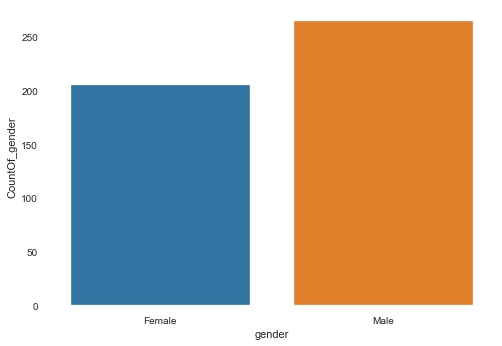

In [34]:
sns.barplot(x = "gender", y = "CountOf_gender", data = bar )
plt.show()

In [35]:
#Q13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

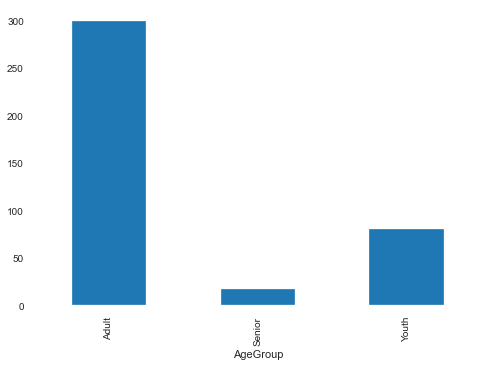

In [36]:
fraudulent = data.loc[data['fraudulent'] == 'Yes']
group_age = fraudulent.groupby(['AgeGroup'])['total_policy_claims'].sum()
group_age.plot(kind = 'bar')

In [37]:
#Q14 Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

In [38]:
data['Month'] = pd.to_datetime(data['claim_date'], errors='coerce')


data['month_year'] = pd.to_datetime(data['claim_date'], errors='coerce')

In [39]:
result = data.groupby((['month_year']))["claim_amount"].sum()
result

month_year
2017-01-01    203227.0
2017-01-07    137763.5
2017-01-14    138807.5
2017-01-21     47635.5
2017-01-27     44327.5
                ...   
2018-10-03    175367.0
2018-10-09    225007.5
2018-10-16    119829.0
2018-10-23    122143.0
2018-10-30     95794.5
Name: claim_amount, Length: 100, dtype: float32

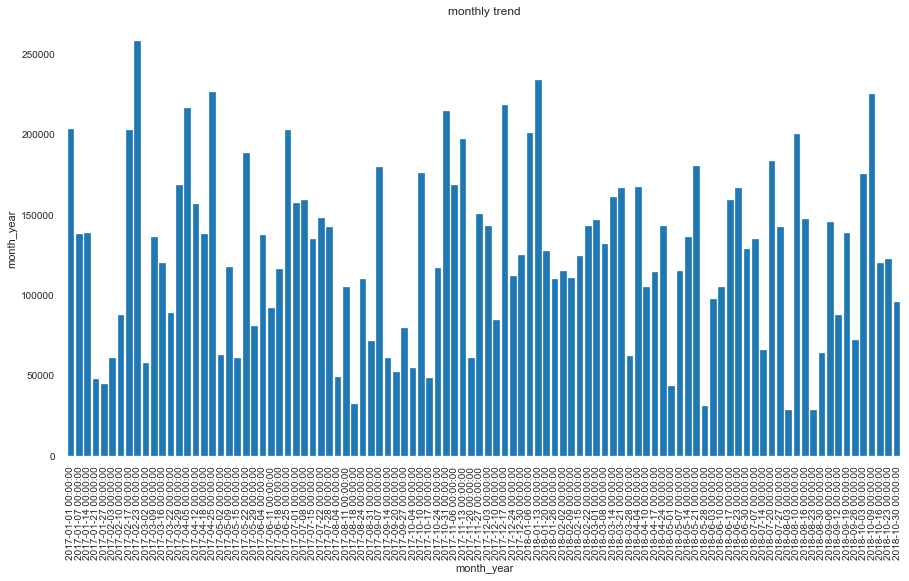

In [40]:
result.T.plot(kind="bar",figsize=(15,8),width=0.8)
plt.ylabel("month_year")
plt.title("monthly trend")
plt.show()

In [41]:
#Q15. What is the average claim amount for gender and age categories andsuitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims

In [42]:
average = data.groupby((["fraudulent","AgeGroup","gender"]))["claim_amount"].sum()
average

fraudulent  AgeGroup  gender
No          Adult     Female    3377450.0
                      Male      3574270.0
            Senior    Female      69610.0
                      Male       165250.0
            Youth     Female    1238920.0
                      Male      1159210.0
Yes         Adult     Female    1109002.5
                      Male      1411188.0
            Senior    Female      12650.0
                      Male        40330.5
            Youth     Female     148798.5
                      Male       283325.5
Name: claim_amount, dtype: float32

In [43]:
average= average.unstack(level=0)
average

fraudulent              No        Yes
AgeGroup gender                      
Adult    Female  3377450.0  1109002.5
         Male    3574270.0  1411188.0
Senior   Female    69610.0    12650.0
         Male     165250.0    40330.5
Youth    Female  1238920.0   148798.5
         Male    1159210.0   283325.5

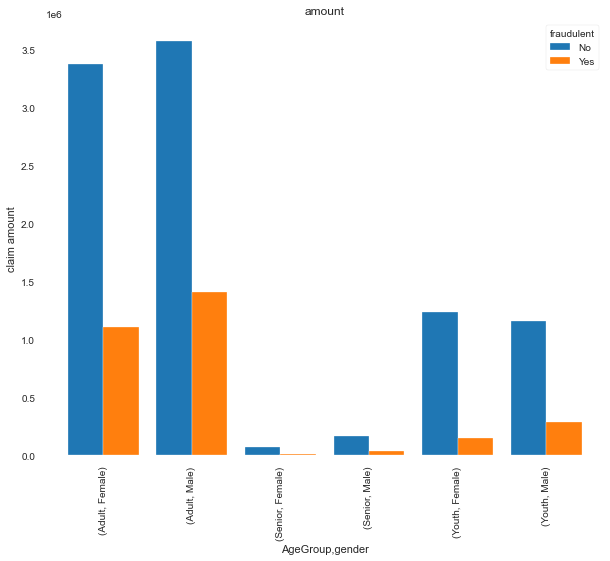

In [44]:
average.plot(kind="bar",figsize=(10,8),width=0.8)
plt.ylabel("claim amount")
plt.title("amount")
plt.show()

In [45]:
#16. Is there any similarity in the amount claimed by males and females?

### F-test/anova

In [46]:
import scipy.stats as stats

claim_male = data['claim_amount'].loc[data['gender']=="Male"]

claim_female = data['claim_amount'].loc[data['gender']=="Female"]


In [47]:
print("The average amount claimed by males is {}".format(claim_male.mean()))

print("The average amount claimed by females is {}".format(claim_female.mean()))

The average amount claimed by males is 12855.763671875
The average amount claimed by females is 12033.1943359375


In [48]:
print( "The var amount claimed by males is {}".format(claim_male.var()))
print( "The var amount claimed by males is {}".format(claim_female.var()))

The var amount claimed by males is 196541104.0
The var amount claimed by males is 182423792.0


In [49]:
stats.f_oneway(claim_male, claim_female)

F_onewayResult(statistic=0.9014537143783418, pvalue=0.3426195654901364)

In [50]:
#Q17. Is there any relationship between age category and segment?

#### Chi-Square Test

In [51]:
test = pd.crosstab( data.AgeGroup, data.Segment )
test

Segment,Gold,Platinum,Silver
AgeGroup,,,
Adult,268,247,237
Senior,5,12,8
Youth,74,86,74


In [52]:
stats.chi2_contingency( test )

(4.616557555494832,
 0.3289496003649619,
 4,
 array([[258.10484669, 256.61721068, 237.27794263],
        [  8.58061325,   8.53115727,   7.88822948],
        [ 80.31454006,  79.85163205,  73.83382789]]))

In [53]:
#Q18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

In [54]:
stats.ttest_1samp( data.claim_amount, 10000 )

Ttest_1sampResult(statistic=5.664287446813725, pvalue=1.9242812878895533e-08)

In [55]:
#Q19. Is there any difference between age groups and insurance claims?

#### F-Test/anova

In [56]:
data.AgeGroup.unique()

array(['Adult', 'Youth', 'Senior'], dtype=object)

In [57]:
age_group_1 = data['total_policy_claims'].loc[data['AgeGroup']=="Adult"]
age_group_2 = data['total_policy_claims'].loc[data['AgeGroup']=='Youth']
age_group_3= data['total_policy_claims'].loc[data['AgeGroup']=="Senior"]

In [58]:
print( 'Mean age_group_1:', format(age_group_1.mean()))
print( 'Mean age_group_2:', format(age_group_2.mean()))
print( 'Mean age_group_3:', format(age_group_3.mean()))

Mean age_group_1: 1.5691489361702127
Mean age_group_2: 1.6623931623931625
Mean age_group_3: 1.52


In [59]:
stats.f_oneway(age_group_1, age_group_2, age_group_3)

F_onewayResult(statistic=0.6363925045771673, pvalue=0.5294105499287411)

In [60]:
#Q20. Is there any relationship between total number of policy claims and the claimed amount?

In [61]:
data.total_policy_claims.corr(other=data.claim_amount)

-0.01808658678959939

In [62]:
data.total_policy_claims.corr(other=data.claim_amount)

-0.01808658678959939

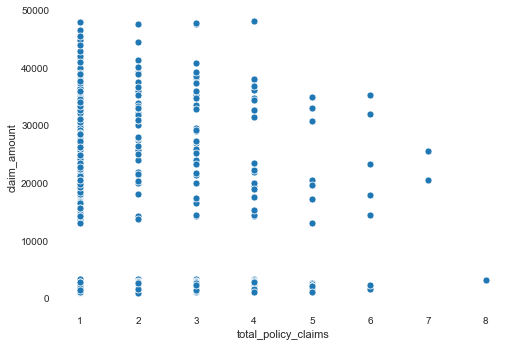

In [63]:
sns.scatterplot( data.total_policy_claims,data.claim_amount)
plt.show()